In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score


In [4]:
import gc 
gc.collect()

0

In [5]:
df = pd.read_csv("data/modelado/ds_modelado.csv")
df_invierno = df[df["estacion_del_anio"] == 3].copy()
df_invierno = df_invierno[df_invierno["duracion_recorrido"] > 1].copy()
# df_invierno = df_invierno[df_invierno["usuario_registrado"] == 1].copy()

train_df, val_df = train_test_split(
    df_invierno,
    test_size=0.2,
    random_state=42,
    stratify=df_invierno["año_intervalo"]
)

In [6]:
target = "N_arribos_intervalo"


cols_a_excluir = [
    "N_arribos_intervalo",
    "N_salidas_intervalo",         
    "id_recorrido",
    "id_estacion_destino",
    "barrio_destino",
    "zona_destino_cluster",
    "cantidad_estaciones_cercanas_destino",
    "año_destino", "mes_destino", "dia_destino",
    "hora_destino", "minuto_destino", "segundo_destino",
    "duracion_recorrido",
    "timestamp_intervalo",                  
    "salidas_acumuladas_origen",         
    "salidas_intervalo_acumuladas",       
    "recurrencia_usuario", "fecha_intervalo" ,"timestamp_intervalo",          
]
features = [col for col in df_invierno.columns if col not in cols_a_excluir]

X_train = train_df[features]
y_train = train_df[target]

X_val = val_df[features]
y_val = val_df[target]

In [7]:
print(features)

['id_estacion_origen', 'id_usuario', 'modelo_bicicleta', 'barrio_origen', 'dia_semana', 'es_finde', 'estacion_del_anio', 'edad_usuario', 'año_alta', 'mes_alta', 'genero_FEMALE', 'genero_MALE', 'genero_OTHER', 'usuario_registrado', 'zona_origen_cluster', 'cantidad_estaciones_cercanas_origen', 'año_origen', 'mes_origen', 'dia_origen', 'hora_origen', 'minuto_origen', 'segundo_origen', 'año_intervalo', 'mes_intervalo', 'dia_intervalo', 'hora_intervalo', 'minuto_intervalo', 'N_SALIDAS_PROM_2INT', 'N_ARRIBOS_PROM_2INT', 'N_SALIDAS_LAG1', 'N_ARRIBOS_LAG1', 'N_SALIDAS_LAG2', 'N_ARRIBOS_LAG2', 'N_SALIDAS_LAG3', 'N_ARRIBOS_LAG3', 'id_estacion_destino_LAG1', 'id_estacion_destino_LAG2', 'id_estacion_destino_LAG3', 'barrio_destino_LAG1', 'barrio_destino_LAG2', 'barrio_destino_LAG3', 'cantidad_estaciones_cercanas_destino_LAG1', 'cantidad_estaciones_cercanas_destino_LAG2', 'cantidad_estaciones_cercanas_destino_LAG3', 'año_destino_LAG1', 'año_destino_LAG2', 'año_destino_LAG3', 'mes_destino_LAG1', 'mes

In [11]:
model = RandomForestRegressor(
    random_state=42,
    n_jobs=-1,        
    max_depth=50    
)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, n_jobs=-1, random_state=42)

In [12]:
y_train_pred = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = root_mean_squared_error(y_train, y_train_pred)

y_val_pred = model.predict(X_val)
mae_val = mean_absolute_error(y_val, y_val_pred)
rmse_val = root_mean_squared_error(y_val, y_val_pred)

print("Train:")
print(f"  MAE:  {mae_train:.2f}")
print(f"  RMSE: {rmse_train:.2f}")
print("Validation:")
print(f"  MAE:  {mae_val:.2f}")
print(f"  RMSE: {rmse_val:.2f}")

Train:
  MAE:  0.42
  RMSE: 0.58
Validation:
  MAE:  1.12
  RMSE: 1.55


In [13]:
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)

print(f"R² Train: {r2_train:.3f}")
print(f"R² Val:   {r2_val:.3f}")

R² Train: 0.935
R² Val:   0.540


In [14]:
df_invierno["N_arribos_intervalo"].describe()

count    2.373087e+06
mean     2.772143e+00
std      2.289093e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.700000e+01
Name: N_arribos_intervalo, dtype: float64

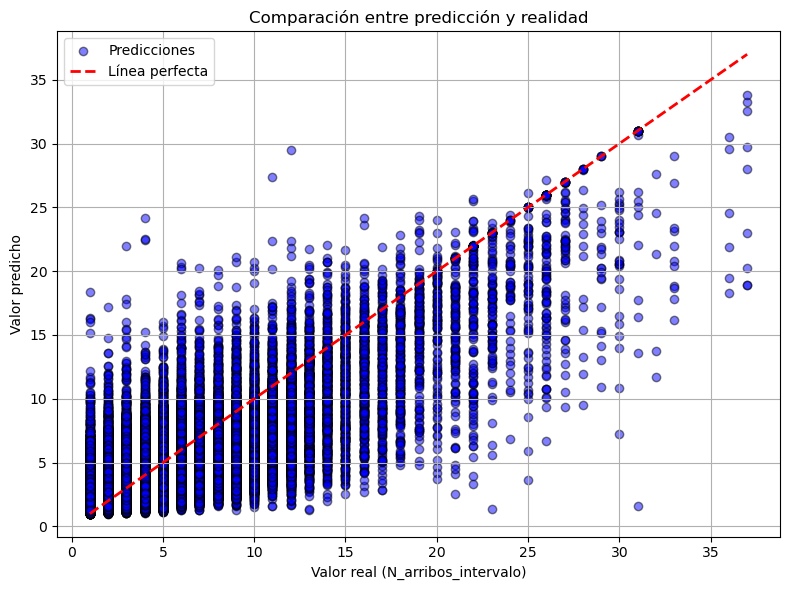

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))

# Puntos reales vs predichos
plt.scatter(y_val, y_val_pred, color="blue", alpha=0.5, edgecolors="k", label="Predicciones")

# Línea perfecta
min_val = min(y_val.min(), y_val_pred.min())
max_val = max(y_val.max(), y_val_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label="Línea perfecta")

plt.xlabel("Valor real (N_arribos_intervalo)")
plt.ylabel("Valor predicho")
plt.title("Comparación entre predicción y realidad")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

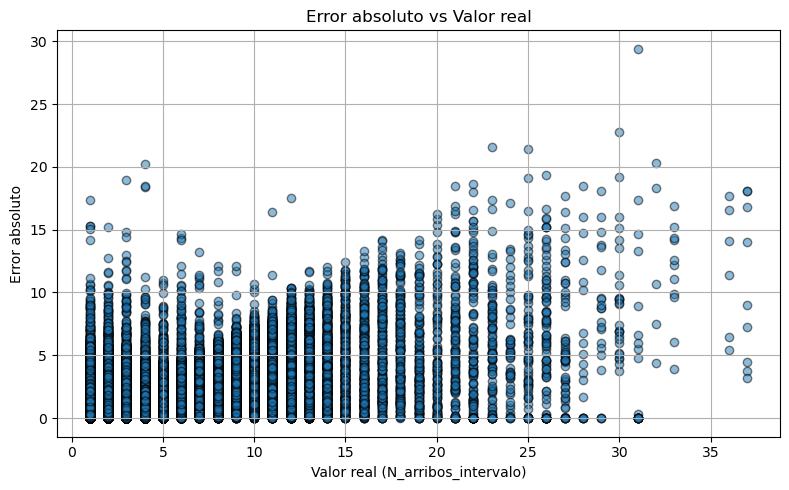

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular error absoluto
errores_abs = np.abs(y_val - y_val_pred)

plt.figure(figsize=(8, 5))
plt.scatter(y_val, errores_abs, alpha=0.5, edgecolors="k")
plt.xlabel("Valor real (N_arribos_intervalo)")
plt.ylabel("Error absoluto")
plt.title("Error absoluto vs Valor real")
plt.grid(True)
plt.tight_layout()
plt.show()

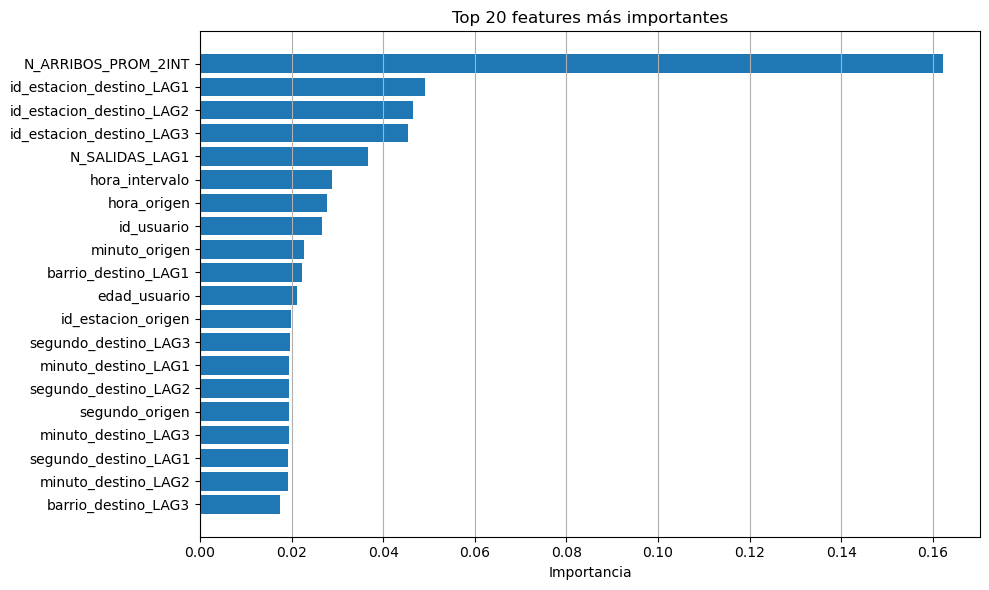

In [17]:
import pandas as pd

# Crear DataFrame con las importancias
importancias = model.feature_importances_
importancias_df = pd.DataFrame({
    "feature": X_train.columns,
    "importancia": importancias
}).sort_values(by="importancia", ascending=False)

# Graficar las top 20
plt.figure(figsize=(10, 6))
plt.barh(importancias_df["feature"][:20][::-1], importancias_df["importancia"][:20][::-1])
plt.xlabel("Importancia")
plt.title("Top 20 features más importantes")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

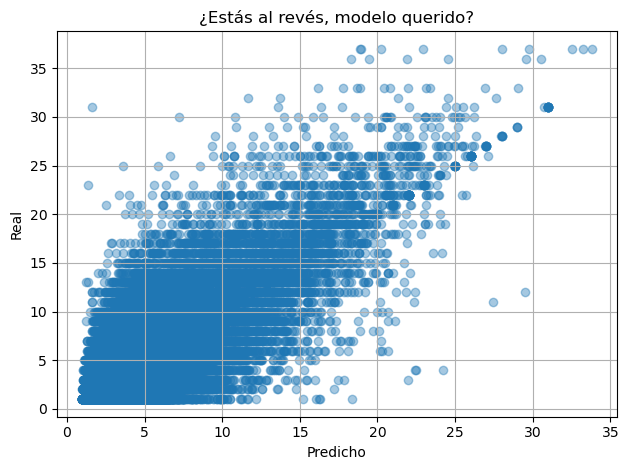

In [18]:
import matplotlib.pyplot as plt

plt.scatter(y_val_pred, y_val, alpha=0.4)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("¿Estás al revés, modelo querido?")
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

for quantile in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    model_q90 = HistGradientBoostingRegressor(loss='quantile', quantile=quantile, random_state=42)
    model_q90.fit(X_train, y_train)

    # Predicción
    y_pred_q90 = model_q90.predict(X_val)

    # Métricas
    mae_q90 = mean_absolute_error(y_val, y_pred_q90)
    rmse_q90 = root_mean_squared_error(y_val, y_pred_q90)
    r2_q90 = r2_score(y_val, y_pred_q90)

    print(f"MAE (q={quantile}): {mae_q90:.2f}")
    print(f"RMSE (q={quantile}): {rmse_q90:.2f}")
    print(f"R²   (q={quantile}): {r2_q90:.3f}")

MAE (q=0.1): 1.74
RMSE (q=0.1): 2.80
R²   (q=0.1): -0.494
MAE (q=0.2): 1.73
RMSE (q=0.2): 2.77
R²   (q=0.2): -0.459
MAE (q=0.3): 1.74
RMSE (q=0.3): 2.86
R²   (q=0.3): -0.562
MAE (q=0.4): 1.20
RMSE (q=0.4): 1.94
R²   (q=0.4): 0.279
MAE (q=0.5): 1.15
RMSE (q=0.5): 1.77
R²   (q=0.5): 0.400
MAE (q=0.6): 1.18
RMSE (q=0.6): 1.70
R²   (q=0.6): 0.451
MAE (q=0.7): 1.30
RMSE (q=0.7): 1.76
R²   (q=0.7): 0.408
MAE (q=0.8): 1.57
RMSE (q=0.8): 2.02
R²   (q=0.8): 0.223
MAE (q=0.9): 2.19
RMSE (q=0.9): 2.68
R²   (q=0.9): -0.365


In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [21]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
import numpy as np

model_xgb = XGBRegressor(
    n_estimators=1000,
    max_depth=17,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = root_mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("📈 XGBoost Metrics")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")


📈 XGBoost Metrics
MAE: 1.04
RMSE: 1.45
R²: 0.599


In [8]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

model_xgb_poisson = XGBRegressor(
    n_estimators=800,
    max_depth=15,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="count:poisson",
    random_state=42,
    n_jobs=-1
)

model_xgb_poisson.fit(X_train, y_train)
y_pred = model_xgb_poisson.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = root_mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("📈 XGBoost con Poisson")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")

📈 XGBoost con Poisson
MAE: 1.01
RMSE: 1.44
R²: 0.614


/var/folders/6y/f0qlfq094gx2tt5rz2y_xphm0000gn/T/ipykernel_31023/3216030814.py:20: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


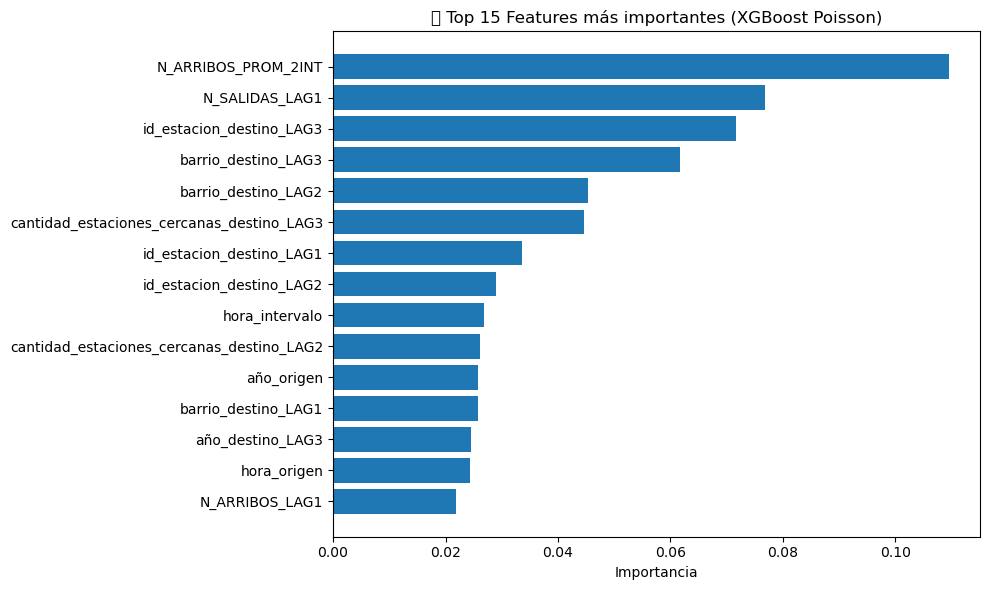

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Obtener importancias de las features
importances = model_xgb_poisson.feature_importances_
feature_names = X_train.columns

# Crear DataFrame ordenado
feat_imp_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False).head(15)

# Gráfico
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df["feature"], feat_imp_df["importance"])
plt.gca().invert_yaxis()  # Para que la más importante quede arriba
plt.xlabel("Importancia")
plt.title("🎯 Top 15 Features más importantes (XGBoost Poisson)")
plt.tight_layout()
plt.show()

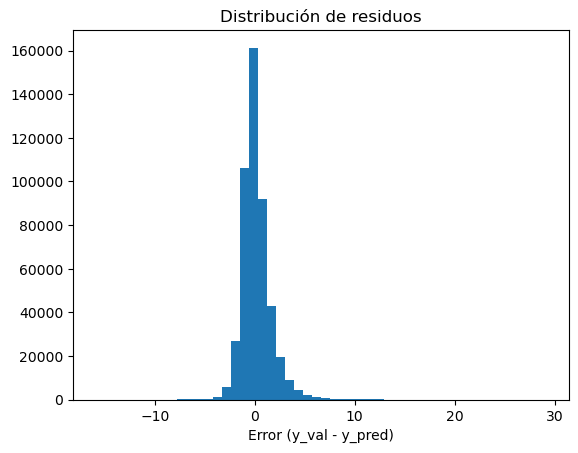

In [24]:
import matplotlib.pyplot as plt
plt.hist(y_val - y_pred, bins=50)
plt.title("Distribución de residuos")
plt.xlabel("Error (y_val - y_pred)")
plt.show()

In [25]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
import numpy as np

import lightgbm as lgb

model_lgb = lgb.LGBMRegressor(
    objective="poisson",
    learning_rate=0.05,
    n_estimators=1000,
    max_depth=17,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

model_lgb.fit(X_train, y_train)
y_pred = model_lgb.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
rmse = root_mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("📈 LightGBM Metrics")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2828
[LightGBM] [Info] Number of data points in the train set: 1898469, number of used features: 60
[LightGBM] [Info] Start training from score 1.019778
📈 LightGBM Metrics
MAE: 1.11
RMSE: 1.56
R²: 0.537


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# ========================
# === 1. CARGAR DATOS ====
# ========================

df = pd.read_csv("data/modelado/ds_modelado_ref.csv")
df.dropna(inplace=True)

# Filtrar dataset
df = df[
    (df["duracion_recorrido"] > 1) &
    (df["usuario_registrado"] == 1)
].copy()

# ================================
# === 2. DEFINIR COLUMNAS A DROP ==
# ================================

cols_a_excluir = [
    "N_arribos_intervalo",
    "N_salidas_intervalo",         
    "id_recorrido",
    "id_estacion_destino",
    "barrio_destino",
    "zona_destino_cluster",
    "cantidad_estaciones_cercanas_destino",
    "año_destino", "mes_destino", "dia_destino",
    "hora_destino", "minuto_destino", "segundo_destino",
    "duracion_recorrido",
    "fecha_intervalo", 'estacion_referencia'
]

target = "N_arribos_intervalo"

# ========================
# === 3. SPLIT STRATIFICADO POR AÑO ===
# ========================

X = df.drop(columns=cols_a_excluir + [target])
y = df[target]
stratify_col = df["año_intervalo"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=stratify_col
)

# ========================
# === 4. MARCAR GRUPOS ===
# ========================

X_train["grupo_modelo"] = (
    X_train["estacion_del_anio"].astype(str) + "_" + X_train["es_finde"].astype(str)
)
X_val["grupo_modelo"] = (
    X_val["estacion_del_anio"].astype(str) + "_" + X_val["es_finde"].astype(str)
)

# ========================
# === 5. ENTRENAR MODELOS POR GRUPO ===
# ========================

modelos = {}

for grupo, Xg in X_train.groupby("grupo_modelo"):
    print(f"Entrenando modelo para grupo {grupo}...")
    yg = y_train.loc[Xg.index]

    modelo = XGBRegressor(
        n_estimators=800,
        max_depth=15,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="count:poisson",
        random_state=42,
        n_jobs=-1
    )

    modelo.fit(Xg.drop(columns=["grupo_modelo"]), yg)
    modelos[grupo] = modelo

# ========================
# === 6. PREDICCIÓN ENSAMBLADA ===
# ========================

y_val_preds = pd.Series(index=X_val.index, dtype=float)

for grupo, Xg in X_val.groupby("grupo_modelo"):
    modelo = modelos.get(grupo)
    if modelo:
        y_pred = modelo.predict(Xg.drop(columns=["grupo_modelo"]))
        y_val_preds.loc[Xg.index] = y_pred
    else:
        print(f"No hay modelo para el grupo {grupo}")

# ========================
# === 7. EVALUACIÓN FINAL ===
# ========================

print("=== MÉTRICAS VALIDACIÓN ===")
print("MAE:", mean_absolute_error(y_val, y_val_preds))
print("R²:", r2_score(y_val, y_val_preds))

Entrenando modelo para grupo 1_0...
Entrenando modelo para grupo 1_1...
Entrenando modelo para grupo 2_0...
Entrenando modelo para grupo 2_1...
Entrenando modelo para grupo 3_0...
Entrenando modelo para grupo 3_1...
Entrenando modelo para grupo 4_0...
Entrenando modelo para grupo 4_1...
=== MÉTRICAS VALIDACIÓN ===
MAE: 0.439963262695015
R²: 0.8472424526186517


In [3]:
 # Elegí uno de los modelos entrenados, por ejemplo:
modelo_ejemplo = list(modelos.values())[0]

# Imprimir features usadas
print("Features usadas en el entrenamiento:")
print(modelo_ejemplo.feature_names_in_)

Features usadas en el entrenamiento:
['id_estacion_origen' 'id_usuario' 'modelo_bicicleta' 'barrio_origen'
 'dia_semana' 'es_finde' 'estacion_del_anio' 'edad_usuario' 'año_alta'
 'mes_alta' 'genero_FEMALE' 'genero_MALE' 'genero_OTHER'
 'usuario_registrado' 'zona_origen_cluster'
 'cantidad_estaciones_cercanas_origen' 'año_origen' 'mes_origen'
 'dia_origen' 'hora_origen' 'minuto_origen' 'segundo_origen'
 'año_intervalo' 'mes_intervalo' 'dia_intervalo' 'hora_intervalo'
 'minuto_intervalo' 'N_SALIDAS_PROM_2INT' 'N_ARRIBOS_PROM_2INT'
 'id_estacion_destino_LAG1' 'id_estacion_destino_LAG2'
 'id_estacion_destino_LAG3' 'barrio_destino_LAG1' 'barrio_destino_LAG2'
 'barrio_destino_LAG3' 'cantidad_estaciones_cercanas_destino_LAG1'
 'cantidad_estaciones_cercanas_destino_LAG2'
 'cantidad_estaciones_cercanas_destino_LAG3' 'año_destino_LAG1'
 'año_destino_LAG2' 'año_destino_LAG3' 'mes_destino_LAG1'
 'mes_destino_LAG2' 'mes_destino_LAG3' 'dia_destino_LAG1'
 'dia_destino_LAG2' 'dia_destino_LAG3' 'hora_d

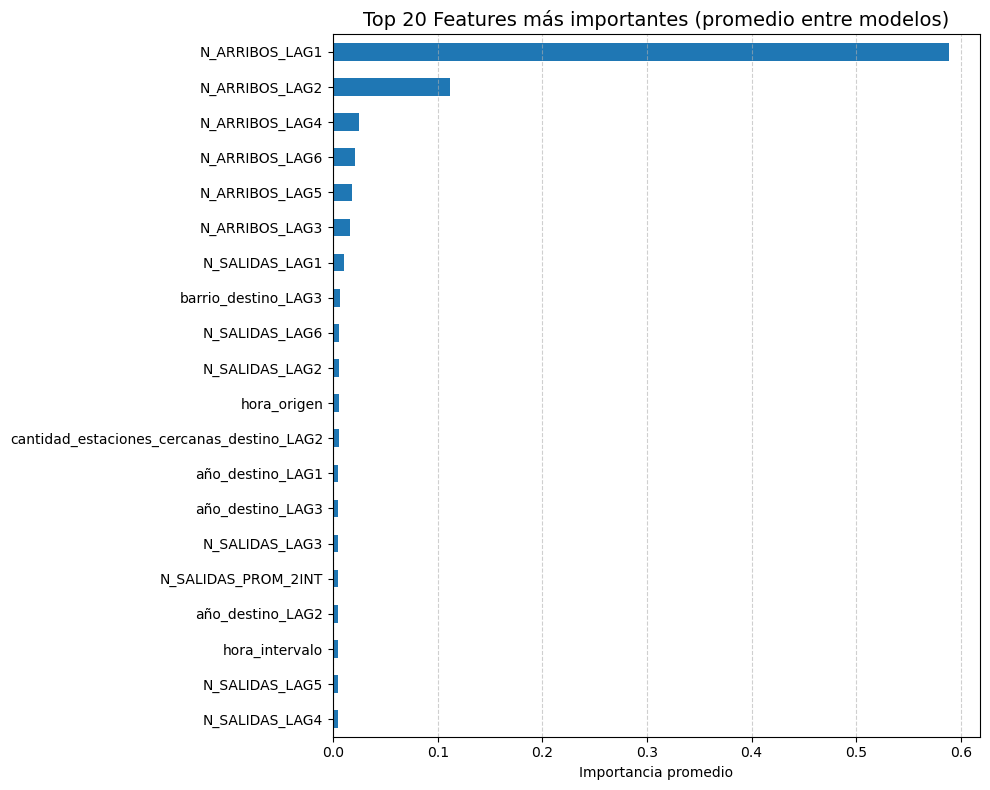

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# === 1. Obtener lista de features ===
features = X_train.drop(columns=["grupo_modelo"]).columns

# === 2. Crear DataFrame con importancias de todos los modelos ===
importancias_por_modelo = []

for grupo, modelo in modelos.items():
    importancia = modelo.feature_importances_
    importancias_por_modelo.append(pd.Series(importancia, index=features))

# === 3. Promediar importancias ===
importancias_df = pd.concat(importancias_por_modelo, axis=1)
importancias_promedio = importancias_df.mean(axis=1).sort_values(ascending=False)

# === 4. Graficar top N features ===
top_n = 20
plt.figure(figsize=(10, 8))
importancias_promedio.head(top_n).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top 20 Features más importantes (promedio entre modelos)", fontsize=14)
plt.xlabel("Importancia promedio")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# ========================
# === 1. CARGAR DATOS ====
# ========================

df = pd.read_csv("data/modelado/ds_modelado_ref.csv")
df.dropna(inplace=True)

# Filtrar dataset
df = df[
    (df["duracion_recorrido"] > 1) 
].copy()

# ================================
# === 2. DEFINIR COLUMNAS A DROP ==
# ================================

cols_a_excluir = [
    "N_arribos_intervalo",
    "N_salidas_intervalo",         
    "id_recorrido",
    "id_estacion_destino",
    "barrio_destino",
    "zona_destino_cluster",
    "cantidad_estaciones_cercanas_destino",
    "año_destino", "mes_destino", "dia_destino",
    "hora_destino", "minuto_destino", "segundo_destino",
    "duracion_recorrido",
    "fecha_intervalo"
]

target = "N_arribos_intervalo"

# ========================
# === 3. SPLIT STRATIFICADO POR AÑO ===
# ========================

X = df.drop(columns=cols_a_excluir + [target])
y = df[target]
stratify_col = df["año_intervalo"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=stratify_col
)

# ========================
# === 4. MARCAR GRUPOS ===
# ========================

X_train["grupo_modelo"] = (
    X_train["estacion_del_anio"].astype(str) + "_" + X_train["es_finde"].astype(str)
)
X_val["grupo_modelo"] = (
    X_val["estacion_del_anio"].astype(str) + "_" + X_val["es_finde"].astype(str)
)

# ========================
# === 5. ENTRENAR MODELOS POR GRUPO ===
# ========================

modelos = {}

for grupo, Xg in X_train.groupby("grupo_modelo"):
    print(f"Entrenando modelo para grupo {grupo}...")
    yg = y_train.loc[Xg.index]

    modelo = XGBRegressor(
        n_estimators=800,
        max_depth=15,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="count:poisson",
        random_state=42,
        n_jobs=-1
    )

    modelo.fit(Xg.drop(columns=["grupo_modelo"]), yg)
    modelos[grupo] = modelo

# ========================
# === 6. PREDICCIÓN ENSAMBLADA ===
# ========================

y_val_preds = pd.Series(index=X_val.index, dtype=float)

for grupo, Xg in X_val.groupby("grupo_modelo"):
    modelo = modelos.get(grupo)
    if modelo:
        y_pred = modelo.predict(Xg.drop(columns=["grupo_modelo"]))
        y_val_preds.loc[Xg.index] = y_pred
    else:
        print(f"No hay modelo para el grupo {grupo}")

# ========================
# === 7. EVALUACIÓN FINAL ===
# ========================

print("=== MÉTRICAS VALIDACIÓN ===")
print("MAE:", mean_absolute_error(y_val, y_val_preds))
print("R²:", r2_score(y_val, y_val_preds))

Entrenando modelo para grupo 1_0...
Entrenando modelo para grupo 1_1...
Entrenando modelo para grupo 2_0...
Entrenando modelo para grupo 2_1...
Entrenando modelo para grupo 3_0...
Entrenando modelo para grupo 3_1...
Entrenando modelo para grupo 4_0...
Entrenando modelo para grupo 4_1...
=== MÉTRICAS VALIDACIÓN ===
MAE: 0.44164645472825964
R²: 0.8483223009690835


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd

def entrenar_modelos_por_grupo_temporal(path_modelado):
    df = pd.read_csv(path_modelado)
    df.dropna(inplace=True)

    df = df[df["duracion_recorrido"] > 1].copy()

    target = "N_arribos_intervalo"
    cols_a_excluir = [
        "N_arribos_intervalo",
        "N_salidas_intervalo",         
        "id_recorrido",
        "id_estacion_destino",
        "barrio_destino",
        "zona_destino_cluster",
        "cantidad_estaciones_cercanas_destino",
        "año_destino", "mes_destino", "dia_destino",
        "hora_destino", "minuto_destino", "segundo_destino",
        "duracion_recorrido",
        "fecha_intervalo"
    ]

    # === SPLIT TEMPORAL ===
    df_train = df[(df["año_intervalo"] < 2024) | ((df["año_intervalo"] == 2024) & (df["mes_intervalo"] <= 4))].copy()
    df_val = df[(df["año_intervalo"] == 2024) & (df["mes_intervalo"] >= 5)].copy()

    X_train = df_train.drop(columns=cols_a_excluir + [target])
    y_train = df_train[target]
    X_val = df_val.drop(columns=cols_a_excluir + [target])
    y_val = df_val[target]

    # === GRUPO MODELO ===
    X_train["grupo_modelo"] = X_train["estacion_del_anio"].astype(str) + "_" + X_train["es_finde"].astype(str)
    X_val["grupo_modelo"] = X_val["estacion_del_anio"].astype(str) + "_" + X_val["es_finde"].astype(str)

    # === ENTRENAMIENTO ===
    modelos = {}
    for grupo, Xg in X_train.groupby("grupo_modelo"):
        print(f"Entrenando modelo para grupo {grupo}...")
        yg = y_train.loc[Xg.index]

        modelo = XGBRegressor(
            n_estimators=800,
            max_depth=15,
            learning_rate=0.05,
            subsample=0.8,
            colsample_bytree=0.8,
            objective="count:poisson",
            random_state=42,
            n_jobs=-1
        )

        modelo.fit(Xg.drop(columns=["grupo_modelo"]), yg)
        modelos[grupo] = modelo

    # === PREDICCIÓN ENSAMBLADA ===
    y_val_preds = pd.Series(index=X_val.index, dtype=float)

    for grupo, Xg in X_val.groupby("grupo_modelo"):
        modelo = modelos.get(grupo)
        if modelo:
            y_pred = modelo.predict(Xg.drop(columns=["grupo_modelo"]))
            y_val_preds.loc[Xg.index] = y_pred
        else:
            print(f"No hay modelo para el grupo {grupo}")

    # === EVALUACIÓN FINAL ===
    print("=== MÉTRICAS VALIDACIÓN ===")
    print("MAE:", mean_absolute_error(y_val, y_val_preds))
    print("R²:", r2_score(y_val, y_val_preds))

    return modelos, X_val, y_val, y_val_preds, X_train

modelos, X_val, y_val, y_val_preds, X_train = entrenar_modelos_por_grupo_temporal("data/modelado/ds_modelado_ref.csv")   

Entrenando modelo para grupo 1_0...


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def graficar_importancias_por_modelo(modelos, X_train, top_n=20):
    features = X_train.drop(columns=["grupo_modelo"]).columns

    # Crear DataFrame con una columna por modelo (grupo)
    importancias_df = pd.concat(
        [pd.Series(modelo.feature_importances_, index=features, name=grupo)
         for grupo, modelo in modelos.items()],
        axis=1
    )

    # Transponer: filas = grupos, columnas = features
    importancias_df = importancias_df.T

    # Ordenar columnas por importancia promedio
    cols_ordenadas = importancias_df.mean().sort_values(ascending=False).index[:top_n]
    df_top = importancias_df[cols_ordenadas]

    # Graficar heatmap
    plt.figure(figsize=(12, max(6, 0.5 * len(modelos))))
    sns.heatmap(df_top, cmap="YlGnBu", annot=False)
    plt.title(f"Importancia de Features por Modelo (Top {top_n})", fontsize=14)
    plt.xlabel("Feature")
    plt.ylabel("Grupo")
    plt.tight_layout()
    plt.show()

graficar_importancias_por_modelo(modelos, X_train, top_n=20)

NameError: name 'X_train' is not defined